# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# URL for GET requests to retrieve city data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List for holding reponse information
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data in sets of 50 cities,
    # with 5 seconds sleep time, and then continue
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hualmay
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | yantal
Processing Record 6 of Set 1 | meyungs
City not found. Skipping...
Processing Record 7 of Set 1 | flin flon
Processing Record 8 of Set 1 | chabahar
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | mehamn
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | vagur
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | evensk
P

Processing Record 39 of Set 4 | poronaysk
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | tuatapere
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | zhitikara
City not found. Skipping...
Processing Record 44 of Set 4 | amderma
City not found. Skipping...
Processing Record 45 of Set 4 | banjar
Processing Record 46 of Set 4 | lolua
City not found. Skipping...
Processing Record 47 of Set 4 | cabra
Processing Record 48 of Set 4 | nkhotakota
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | ostrovnoy
Processing Record 2 of Set 5 | isla mujeres
Processing Record 3 of Set 5 | pandan
Processing Record 4 of Set 5 | tourlaville
Processing Record 5 of Set 5 | mildura
Processing Record 6 of Set 5 | sable-sur-sarthe
Processing Record 7 of Set 5 | karaul
City not found. Skipping...
Processing Record 8 of Set 5 | robe
Processing Record 9 of Set 5 | banda aceh
Processing Record 10 of Set 5 | w

Processing Record 26 of Set 8 | hofn
Processing Record 27 of Set 8 | victoria point
Processing Record 28 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 29 of Set 8 | havelock
Processing Record 30 of Set 8 | usinsk
Processing Record 31 of Set 8 | noumea
Processing Record 32 of Set 8 | pakxe
Processing Record 33 of Set 8 | deputatskiy
Processing Record 34 of Set 8 | hay river
Processing Record 35 of Set 8 | tabialan
City not found. Skipping...
Processing Record 36 of Set 8 | pakxan
Processing Record 37 of Set 8 | tottori
Processing Record 38 of Set 8 | celarevo
Processing Record 39 of Set 8 | hasilpur
Processing Record 40 of Set 8 | doha
Processing Record 41 of Set 8 | ningbo
Processing Record 42 of Set 8 | ho
City not found. Skipping...
Processing Record 43 of Set 8 | ascension
Processing Record 44 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 45 of Set 8 | sioux lookout
Processing Record 46 of Set 8 | pemba
Processing Record 47 of Set 8 | trang


Processing Record 16 of Set 12 | haibowan
City not found. Skipping...
Processing Record 17 of Set 12 | saint-augustin
Processing Record 18 of Set 12 | mandalgovi
Processing Record 19 of Set 12 | burnie
Processing Record 20 of Set 12 | bilma
Processing Record 21 of Set 12 | brae
Processing Record 22 of Set 12 | acarau
Processing Record 23 of Set 12 | sibolga
Processing Record 24 of Set 12 | beidao
Processing Record 25 of Set 12 | wahran
City not found. Skipping...
Processing Record 26 of Set 12 | chifeng
Processing Record 27 of Set 12 | puerto lempira
Processing Record 28 of Set 12 | bogorodskoye
Processing Record 29 of Set 12 | popondetta
Processing Record 30 of Set 12 | le port
Processing Record 31 of Set 12 | bolshaya chernigovka
City not found. Skipping...
Processing Record 32 of Set 12 | poum
Processing Record 33 of Set 12 | timaru
Processing Record 34 of Set 12 | kachiry
Processing Record 35 of Set 12 | rucheng
Processing Record 36 of Set 12 | qaqortoq
Processing Record 37 of Set 

In [10]:
# Check if we got response for all cities
len(lat)
len(temp_max)

608

In [17]:
city_data_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not return any response from OpenWeatherMap API.
city_data_df = cities_df.dropna(how="any")

city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.52,71.0,2.0,8.84,PF,1.679278e+09
1,hualmay,-11.0964,-77.6139,75.27,76.0,98.0,6.55,PE,1.679278e+09
2,qaanaaq,77.4840,-69.3632,-10.37,62.0,11.0,7.58,GL,1.679278e+09
3,ushuaia,-54.8000,-68.3000,42.46,81.0,75.0,26.46,AR,1.679278e+09
4,yantal,56.8471,105.2542,26.80,95.0,100.0,14.79,RU,1.679278e+09


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,79.52,71.0,2.0,8.84,PF,1.679278e+09
1,hualmay,-11.0964,-77.6139,75.27,76.0,98.0,6.55,PE,1.679278e+09
2,qaanaaq,77.4840,-69.3632,-10.37,62.0,11.0,7.58,GL,1.679278e+09
3,ushuaia,-54.8000,-68.3000,42.46,81.0,75.0,26.46,AR,1.679278e+09
4,yantal,56.8471,105.2542,26.80,95.0,100.0,14.79,RU,1.679278e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

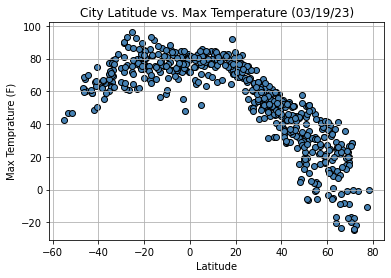

In [67]:
date_now = datetime.date(datetime.now())

# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1_LatvsTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

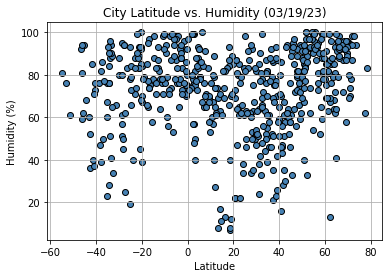

In [66]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2_LatvsHumd.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

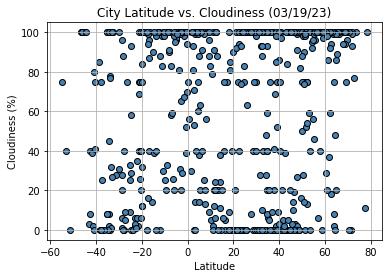

In [65]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3_LatvsCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

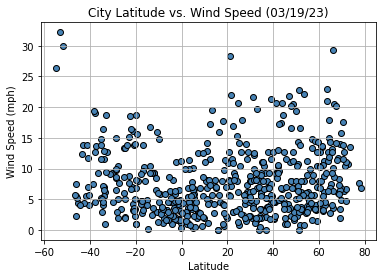

In [64]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4_LatvsWind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_weather_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qaanaaq,77.4840,-69.3632,-10.37,62.0,11.0,7.58,GL,1.679278e+09
4,yantal,56.8471,105.2542,26.80,95.0,100.0,14.79,RU,1.679278e+09
6,flin flon,54.7682,-101.8650,-0.87,99.0,100.0,3.96,CA,1.679278e+09
7,chabahar,25.2919,60.6430,72.59,63.0,0.0,0.87,IR,1.679278e+09
8,kodiak,57.7900,-152.4072,36.91,52.0,40.0,5.75,US,1.679278e+09


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_weather_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,79.52,71.0,2.0,8.84,PF,1.679278e+09
1,hualmay,-11.0964,-77.6139,75.27,76.0,98.0,6.55,PE,1.679278e+09
3,ushuaia,-54.8000,-68.3000,42.46,81.0,75.0,26.46,AR,1.679278e+09
9,hobart,-42.8794,147.3294,59.25,52.0,40.0,13.80,AU,1.679278e+09
15,cidreira,-30.1811,-50.2056,74.14,80.0,31.0,9.26,BR,1.679278e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7910631672370981
The correlation between both factors is -0.89


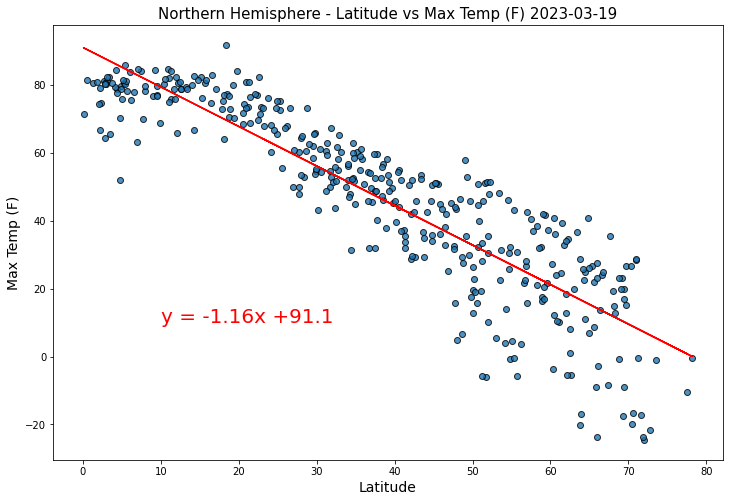

In [63]:
# Linear regression on Southern Hemisphere
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

plt.savefig("output_data/Fig5_North_LatvsTemp.png")
plt.show()

The r-squared is: 0.23008993957457596
The correlation between both factors is 0.48


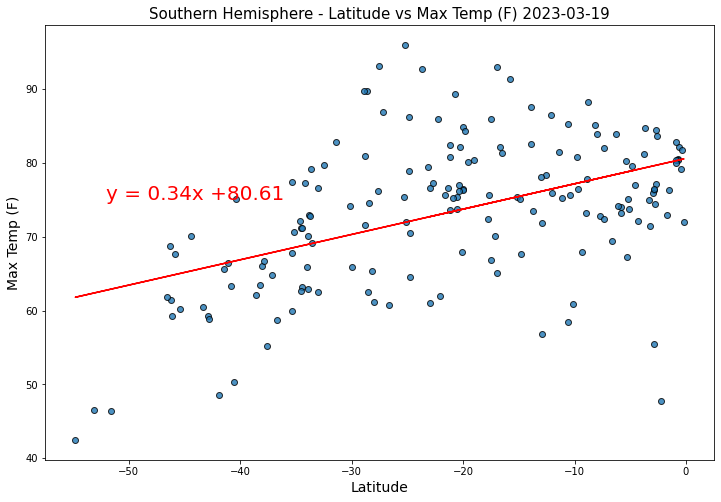

In [62]:
x_values = southern_hemi_weather_df["Lat"]
y_values = southern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

plt.savefig("output_data/Fig6_Sth_LatvsTemp.png")
plt.show()

**Discussion about the linear relationship:** 

The correlation between latitude and maximum temperature is strong for both the hemispheres. It is higher for northern hemisphere (0.89), indicating that as we move away from the equator, the maximum temperature keeps dropping in a more linear manner. Meanwhile, the r-value for southern hemisphere is 0.48, indicating a increase in temperature when getting closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07329996000367464
The correlation between both factors is 0.27


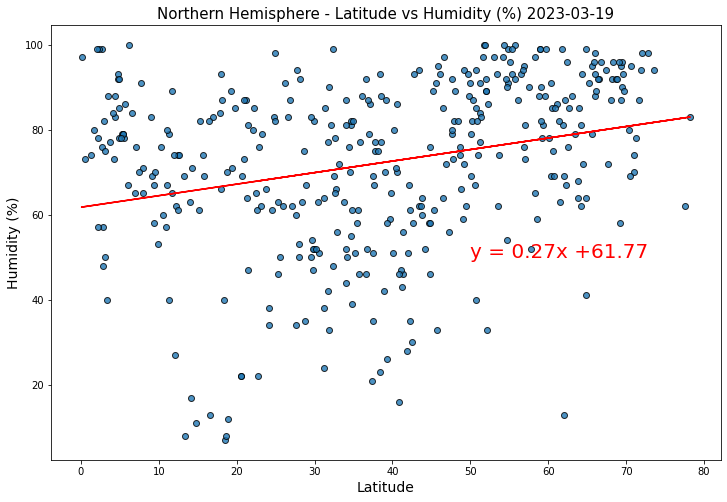

In [61]:
# Northern Hemisphere
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))

plt.savefig("output_data/Fig7_North_LatvsHumd.png")
plt.show()

The r-squared is: 0.09647230433655002
The correlation between both factors is 0.31


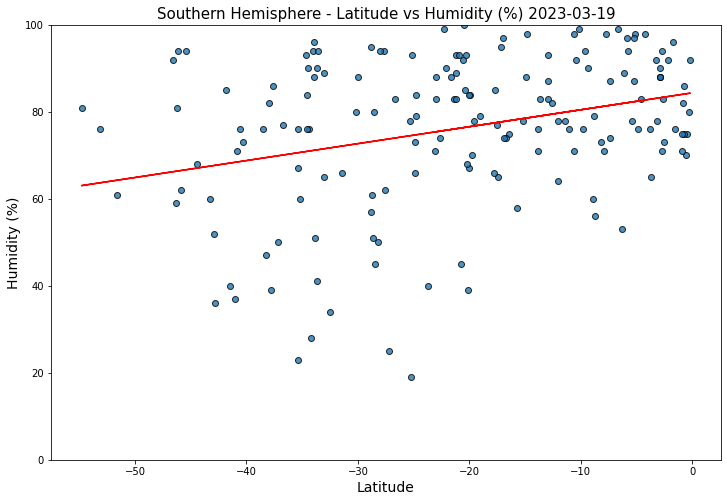

In [68]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)

plt.savefig("output_data/Fig8_South_LatvsHumd")
plt.show()

**Discussion about the linear relationship:** 

The r-value on Northern Hemiphere is 0.27 shows the further away from equator, the more humdity it gets. 

The r-value on Southern Hemisphere is 0.31 shows the closer to the equator, the more humdity it gets. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.045189433202946425
The correlation between both factors is 0.21


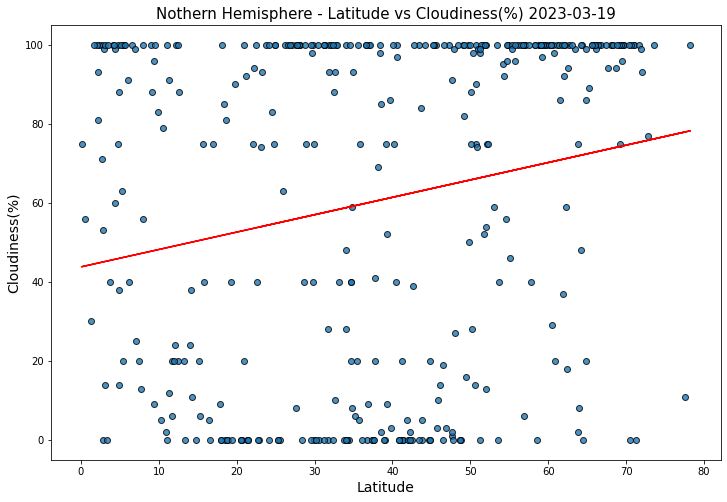

In [70]:
# Northern Hemisphere
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Nothern",(-45, 60))

plt.savefig("output_data/Fig9_North_LatvsCloud")
plt.show()

The r-squared is: 0.09488294312696932
The correlation between both factors is 0.31


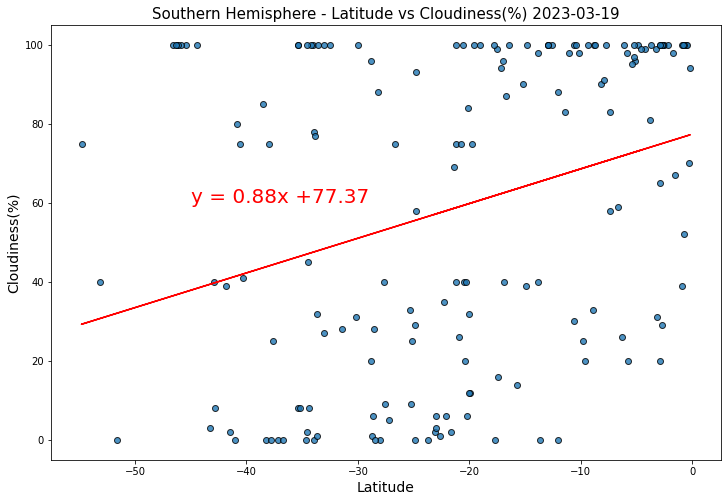

In [71]:
# Southern Hemisphere
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("output_data/Fig10_South_LatvsCloud")
plt.show()

**Discussion about the linear relationship:** 

The r-value on Northern Hemiphere is 0.21 shows the further away from equator, the more cloudy it is.

The r-value on Southern Hemisphere is 0.31 shows the closer to the equator, the more cloudy it is.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.046754705366325776
The correlation between both factors is 0.22


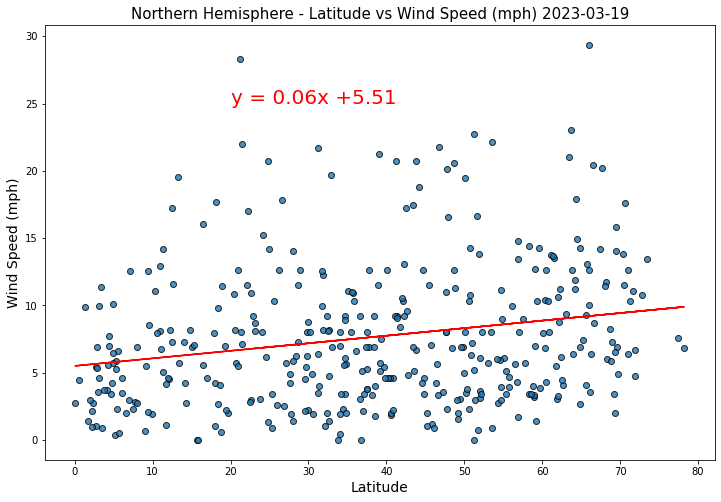

In [72]:
# Northern Hemisphere
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

plt.savefig("output_data/Fig11_North_LatvsWind")
plt.show()

The r-squared is: 0.18614425047997168
The correlation between both factors is -0.43


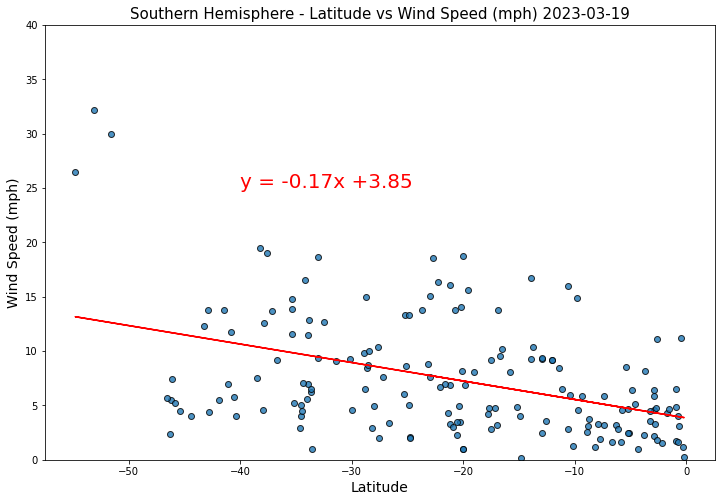

In [73]:
# Southern Hemisphere
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)

plt.savefig("output_data/Fig12_South_LatvsWind")
plt.show()

**Discussion about the linear relationship:** 

The r-value on Northern Hemiphere is 0.22 shows the further away from equator, the more windy it is.

The r-value on Southern Hemisphere is (0.43) shows the closer to the equator, the less windy it is.